In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/Datasets-20230122T094010Z-001.zip

Archive:  /content/drive/MyDrive/Datasets-20230122T094010Z-001.zip
  inflating: Datasets/jones_gabriel.zip  
  inflating: Datasets/yalefaces.zip  
  inflating: Datasets/homer_bart_2.zip  
  inflating: Datasets/homer_bart_1.zip  
  inflating: Datasets/fer2013_2_classes.zip  
  inflating: Datasets/cat_dog_2.zip  
  inflating: Datasets/cat_dog_1.zip  
  inflating: Datasets/fer_images.zip  


In [ ]:
!unzip /content/Datasets/fer_images.zip

Streaming output truncated to the last 5000 lines.
 extracting: fer2013/train/Surprise/259.jpg  
 extracting: fer2013/train/Surprise/2590.jpg  
 extracting: fer2013/train/Surprise/2591.jpg  
 extracting: fer2013/train/Surprise/2592.jpg  
 extracting: fer2013/train/Surprise/2593.jpg  
 extracting: fer2013/train/Surprise/2594.jpg  
 extracting: fer2013/train/Surprise/2595.jpg  
 extracting: fer2013/train/Surprise/2596.jpg  
 extracting: fer2013/train/Surprise/2597.jpg  
 extracting: fer2013/train/Surprise/2598.jpg  
 extracting: fer2013/train/Surprise/2599.jpg  
 extracting: fer2013/train/Surprise/26.jpg  
 extracting: fer2013/train/Surprise/260.jpg  
 extracting: fer2013/train/Surprise/2600.jpg  
 extracting: fer2013/train/Surprise/2601.jpg  
 extracting: fer2013/train/Surprise/2602.jpg  
 extracting: fer2013/train/Surprise/2603.jpg  
 extracting: fer2013/train/Surprise/2604.jpg  
 extracting: fer2013/train/Surprise/2605.jpg  
 extracting: fer2013/train/Surprise/2606.jpg  
 extracting: 

**Train and Test**

In [ ]:
train_generator = ImageDataGenerator(rescale=1./255,rotation_range= 7,horizontal_flip=0.2, zoom_range= 0.2)
train_dataset = train_generator.flow_from_directory('/content/fer2013/train',target_size = (48,48),batch_size = 15,class_mode = 'categorical',shuffle = True)


Found 28709 images belonging to 7 classes.


In [ ]:
train_dataset.classes

array([0, 0, 0, ..., 6, 6, 6], dtype=int32)

In [ ]:
train_dataset.class_indices

{'Angry': 0,
 'Disgust': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

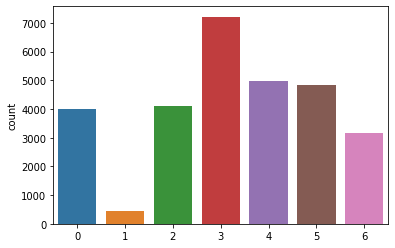

In [ ]:
sns.countplot(x = train_dataset.classes);

In [ ]:
test_generator = ImageDataGenerator(rescale = 1./255)
test_dataset = test_generator.flow_from_directory("/content/fer2013/validation",target_size = (48,48),batch_size = 1,class_mode= 'categorical',shuffle = False)

Found 3589 images belonging to 7 classes.


**Building and Training the convolution neural network**

In [ ]:
num_detectors = 32
num_classes = 7
width, height = 48, 48
epochs = 70

network = Sequential()

network.add(Conv2D(num_detectors, (3,3), activation='relu', padding = 'same', input_shape = (width, height, 3)))
network.add(BatchNormalization())
network.add(Conv2D(num_detectors, (3,3), activation='relu', padding = 'same'))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size=(2,2)))
network.add(Dropout(0.2))

network.add(Conv2D(2*num_detectors, (3,3), activation='relu', padding = 'same'))
network.add(BatchNormalization())
network.add(Conv2D(2*num_detectors, (3,3), activation='relu', padding = 'same'))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size=(2,2)))
network.add(Dropout(0.2))

network.add(Conv2D(2*2*num_detectors, (3,3), activation='relu', padding = 'same'))
network.add(BatchNormalization())
network.add(Conv2D(2*2*num_detectors, (3,3), activation='relu', padding = 'same'))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size=(2,2)))
network.add(Dropout(0.2))

network.add(Conv2D(2*2*2*num_detectors, (3,3), activation='relu', padding = 'same'))
network.add(BatchNormalization())
network.add(Conv2D(2*2*2*num_detectors, (3,3), activation='relu', padding = 'same'))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size=(2,2)))
network.add(Dropout(0.2))

network.add(Flatten())

network.add(Dense(2 * num_detectors, activation='relu'))
network.add(BatchNormalization())
network.add(Dropout(0.2))

network.add(Dense(2 * num_detectors, activation='relu'))
network.add(BatchNormalization())
network.add(Dropout(0.2))

network.add(Dense(num_classes, activation='softmax'))


In [ ]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 48, 48, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                        

In [ ]:
network.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = network.fit(train_dataset, epochs=epochs)

Epoch 1/70
1914/1914 [==============================] - 85s 35ms/step - loss: 1.8427 - accuracy: 0.2754
Epoch 2/70
1914/1914 [==============================] - 56s 29ms/step - loss: 1.5350 - accuracy: 0.4018
Epoch 3/70
1914/1914 [==============================] - 55s 29ms/step - loss: 1.3963 - accuracy: 0.4665
Epoch 4/70
1914/1914 [==============================] - 56s 29ms/step - loss: 1.3113 - accuracy: 0.5038
Epoch 5/70
1914/1914 [==============================] - 59s 31ms/step - loss: 1.2503 - accuracy: 0.5327
Epoch 6/70
1914/1914 [==============================] - 56s 29ms/step - loss: 1.2203 - accuracy: 0.5419
Epoch 7/70
1914/1914 [==============================] - 58s 31ms/step - loss: 1.1836 - accuracy: 0.5581
Epoch 8/70
1914/1914 [==============================] - 56s 29ms/step - loss: 1.1549 - accuracy: 0.5709
Epoch 9/70
1914/1914 [==============================] - 56s 29ms/step - loss: 1.1292 - accuracy: 0.5822
Epoch 10/70
1914/1914 [==============================] - 56s 29m

**Evaluating the neural network**

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

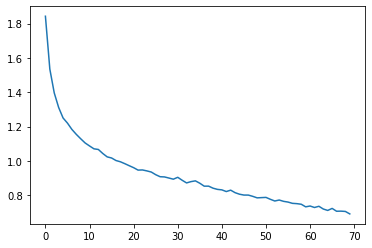

In [ ]:
plt.plot(history.history['loss']);

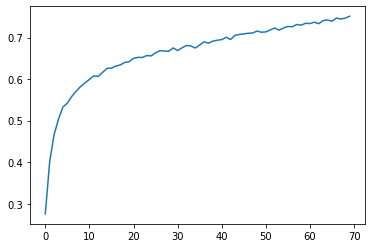

In [ ]:
plt.plot(history.history['accuracy'])

In [ ]:
predictions = network.predict(test_dataset)
predictions

3589/3589 [==============================] - 16s 4ms/step


array([[1.7546661e-01, 9.7252574e-04, 7.4835390e-02, ..., 6.0420066e-01,
        1.1395230e-01, 3.0339574e-02],
       [9.4912416e-01, 5.7721649e-05, 4.7683198e-02, ..., 1.2917284e-04,
        1.9954711e-03, 9.7425078e-04],
       [9.8852205e-01, 3.5300912e-04, 2.0271202e-03, ..., 7.9815829e-04,
        6.9019105e-03, 1.4131874e-06],
       ...,
       [4.6007666e-03, 7.8591474e-05, 8.8571265e-02, ..., 1.2756054e-03,
        1.3348978e-03, 9.0412879e-01],
       [9.1198337e-04, 2.3927414e-06, 9.8878099e-03, ..., 4.4870432e-03,
        7.7185634e-04, 9.8393756e-01],
       [1.2901633e-02, 2.8161297e-04, 4.6881817e-02, ..., 2.9751181e-03,
        3.0301507e-03, 9.2531592e-01]], dtype=float32)

In [ ]:
predictions = np.argmax(predictions,axis = 1)
predictions

array([4, 0, 0, ..., 6, 6, 6])

In [ ]:
test_dataset.classes

array([0, 0, 0, ..., 6, 6, 6], dtype=int32)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(test_dataset.classes,predictions)

0.5865143494009474

In [ ]:
test_dataset.class_indices

{'Angry': 0,
 'Disgust': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_dataset.classes,predictions)
cm

array([[285,   8,  49,  11,  70,  59,   9],
       [  7,  41,   2,   2,   1,   0,   2],
       [ 59,   6, 257,  14,  65,  81,  46],
       [ 21,   0,  11, 770,  40,  28,   9],
       [ 87,  11,  88, 155, 118, 108,  59],
       [ 49,   2,  61,  32, 132, 309,   9],
       [ 10,   0,  36,  26,  12,   7, 325]])

<AxesSubplot:>

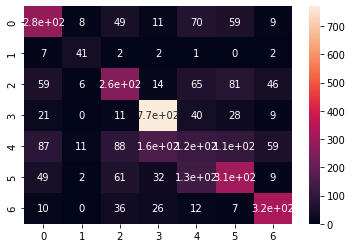

In [ ]:
sns.heatmap(cm,annot=True)

In [ ]:
from sklearn.metrics import classification_report
classification_report(test_dataset.classes,predictions)

'              precision    recall  f1-score   support\n\n           0       0.55      0.58      0.56       491\n           1       0.60      0.75      0.67        55\n           2       0.51      0.49      0.50       528\n           3       0.76      0.88      0.82       879\n           4       0.27      0.19      0.22       626\n           5       0.52      0.52      0.52       594\n           6       0.71      0.78      0.74       416\n\n    accuracy                           0.59      3589\n   macro avg       0.56      0.60      0.58      3589\nweighted avg       0.56      0.59      0.57      3589\n'